# Algoritmo de Denavit - Hartenberg

## Calculo simbólico

Dentro del notebook de Jupyter tenemos la ventaja de utilizar diferentes tipos de elementos desplegables en un página web, como imagenes, interfaces graficas, etc. En esta práctica utilizaremos un nuevo tipo de elementos que nos ayudan a desplegar matemáticas de una manera estetica y funcional.

Como algunos ya se habran dado cuenta, dentro de un notebook tenemos diferentes tipos de celdas, las que aparecen por default cuando creas una nueva celda son celdas de código, pero si queremos una celda de comentarios, tan solo tenemos que cambiarla en el menu de arriba por el tipo `Markdown`.

![](./imagenes/tipo_celda.png)

En este tipo de celda podemos incluso añadir imagenes como la que esta arriba (si quieres ver como se hace, tan solo tienes que hacer doble clic sobre la celda para desplegar el código utilizado).

En especifico nos interesa poder escribir ecuaciones matemáticas como $x_1 = 10$, o bien 

$$ E = m c^2 $$

> Nota que dependiendo del numero de `$`, la ecuación aparecerá en linea junto con el texto, o aparte y centrado.

Pero hasta el momento no hemos hecho ningun cálculo con estas ecuaciones, tan solo las hemos escrito, y a pesar de que se ven bien, no podemos manipularlas de ninguna manera.


Para esto nos ayudará la librería `sympy`, la cual esta diseñada especificamente para poder hacer cálculos simbólicos. Para empezar tenemos que importar algunas funciones de la librería.

In [1]:
# Esta libreria tiene las funciones principales que utilizaremos
from sympy import var, Matrix, Function, sin, cos
# Esta libreria contiene una funcion que la va a dar un formato "bonito" a nuestras ecuaciones
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

Una vez importadas las funciones de nuestra librería, podemos empezar declarando variables (o constantes) conocidas para nosotros.

In [4]:
var("t q1 q2 q3")

In [3]:
var("l1:4")

> Nota que cualquiera de estas dos notaciones es valida para importar variables de sympy

Si ahora creamos una matriz con nuestros datos es posible utilizar las operaciones de matrices conocidas por nosotros, por ejemplo vamos hacer una transformación de movimientos rígidos, definida por la siguiente ecuación:

$$ p_1^0 = R_1 p_0^0 + d_1^0 $$ 

In [7]:
# Defino el punto origen, la rotación y traslación aplicados
p0 = Matrix([[2],
             [3],
             [0]])
R1 = Matrix([[cos(q1), -sin(q1), 0],
             [sin(q1), cos(q1), 0],
             [0, 0, 1]])
d1 = Matrix([[l1],
             [0],
             [0]])

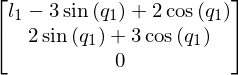

In [8]:
p1 = R1*p0 + d1
p1

## Convención Denavit - Hartenberg

Sabemos que la conveción Denavit - Hartenberg es una manera de obtener las transformaciones homogéneas necesarias para cada eslabon de un manipulador, sin embargo las multiplicaciones de matrices resultantes de este algorimto por lo general consumen demasiado tiempo, por lo que en esta práctica aprenderemos a definir una función que calcule cada matriz de transformación y poder multiplicarlas con la computadora.

Lo primero que necesitamos es la matriz general del algoritmo Denavit - Hartenberg:

$$
A_i = 
\begin{pmatrix}
    c_{\theta_i} & -s_{\theta_i} c_{\alpha_i} & s_{\theta_i} s_{\alpha_i} & a_i c_{\theta_i} \\
    s_{\theta_i} & c_{\theta_i} c_{\alpha_i} & -c_{\theta_i} s_{\alpha_i} & a_i s_{\theta_i} \\
    0 & s_{\alpha_i} & c_{\alpha_i} & d_i \\
    0 & 0 & 0 & 1
\end{pmatrix}
$$

Si escribimos esta matriz dando valores aleatorios a $\theta$, $\alpha$, $d$ y $a$, tendremos:

In [9]:
a = 1.2
d = 0
α = 90
θ = q1

A1 = Matrix([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
             [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
             [0, sin(α), cos(α), d],
             [0, 0, 0, 1]])

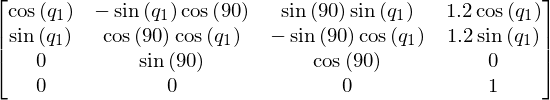

In [10]:
A1

Dando otros valores aleatorios a la misma matriz tendremos:

In [11]:
a = 0.8
d = 0
α = 0
θ = q2

A2 = Matrix([[cos(θ), -sin(θ)*cos(α), sin(θ)*sin(α), a*cos(θ)],
             [sin(θ), cos(θ)*cos(α), -cos(θ)*sin(α), a*sin(θ)],
             [0, sin(α), cos(α), d],
             [0, 0, 0, 1]])

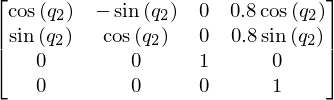

In [12]:
A2

Y de la misma manera que en cualquier motor de algebra, si queremos multiplicar, tan solo tenemos que hacerlo:

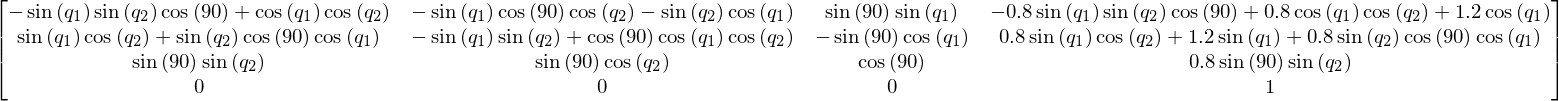

In [13]:
A1*A2

# Ejercicio

1. Por medio de la convención de Denavit - Hartenberg, obtenga los parametros de el manipulador del laboratorio de manufactura.
2. Cree una función que tome como argumentos los parametros de Denavit - Hartenberg y devuelva la matriz de transformación homogénea asociada al eslabon.
3. Cree una función que dados los angulos del manipulador devuelva la transformación total del manipulador (ayudese de la función creada en el segundo punto).
4. Cree una función que dados los angulos del manipulador, grafique las posiciones de los eslabones del manipulador del primer punto (ayudese de la función creada en el segundo punto).